In [1]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

In [3]:
traindata = np.load('TrainSet.npy',allow_pickle=True)
testdata = np.load('TestSet.npy',allow_pickle=True)

In [4]:
testdata = testdata[()]
traindata = traindata[()]

In [5]:
for key in testdata.keys():
    print(key)

Train Labels
DM Plots


In [6]:
testdm = np.array(testdata['DM Plots'])
flattestdm = testdm.reshape(2000,-1)
traindm = np.array(traindata['DM Plots'])
flattraindm = traindm.reshape(6444,-1)

In [7]:
len(traindm)

6444

In [8]:
dm_xgbmodel = xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.001, objective='binary:logistic')


In [9]:
dm_xgbmodel.fit(flattraindm,traindata['Train Labels'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
# make predictions
preds = dm_xgbmodel.predict(flattestdm)
predprob = dm_xgbmodel.predict_proba(flattestdm)

In [11]:
print(preds)

[0 0 1 ... 0 0 1]


In [12]:
print(predprob)

[[0.50079507 0.49920493]
 [0.50013685 0.49986318]
 [0.49922073 0.5007793 ]
 ...
 [0.50013685 0.49986318]
 [0.50079507 0.49920493]
 [0.49922073 0.5007793 ]]


In [13]:
predprob[1][1]

0.49986318

In [14]:
posprobs = []
for i in range(len(predprob)):
    posprobs.append(predprob[i][1])

In [16]:
print(posprobs)

[0.49920493, 0.49986318, 0.5007793, 0.5007793, 0.49920493, 0.5007793, 0.49986318, 0.49986318, 0.5007793, 0.5007793, 0.5000904, 0.49986318, 0.5007793, 0.49986318, 0.5000904, 0.5007793, 0.49986318, 0.49986318, 0.49986318, 0.5007793, 0.5007793, 0.49920493, 0.5007793, 0.49920493, 0.49986318, 0.5000904, 0.49986318, 0.49986318, 0.49986318, 0.49986318, 0.5000904, 0.5007793, 0.49920493, 0.49986318, 0.49986318, 0.49920493, 0.5007793, 0.49986318, 0.49986318, 0.49920493, 0.5000904, 0.5007793, 0.49986318, 0.49920493, 0.49986318, 0.49986318, 0.5007793, 0.49986318, 0.49986318, 0.49986318, 0.5007793, 0.49920493, 0.49986318, 0.49920493, 0.49920493, 0.49920493, 0.49986318, 0.5000904, 0.49920493, 0.49986318, 0.5000904, 0.49986318, 0.49986318, 0.5007793, 0.5000904, 0.49920493, 0.49986318, 0.49986318, 0.49920493, 0.49986318, 0.49920493, 0.49986318, 0.49986318, 0.49986318, 0.49986318, 0.5007793, 0.49986318, 0.49920493, 0.49986318, 0.5007793, 0.49920493, 0.49986318, 0.49920493, 0.49986318, 0.5007793, 0.4998

AUC Score: 0.7654399999999999


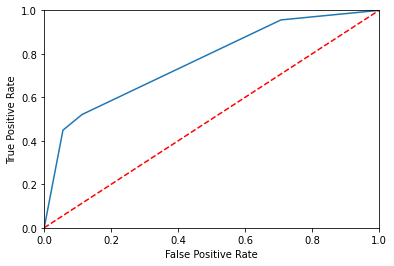

In [15]:
falsepos, truepos, thresholds = metrics.roc_curve(testdata['Train Labels'], posprobs)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")

In [14]:
dm_xgbmodel.save_config('xgbtest.txt')

AttributeError: 'XGBClassifier' object has no attribute 'save_config'

In [ ]:
loadedmodel = xgb.Booster()

In [ ]:
loadedmodel.load_model('xgbtest.txt')

In [ ]:
newpreds = loadedmodel.predict(xgb.DMatrix(flattestdm))

In [ ]:
print(*newpreds)

In [ ]:
# evaluate predictions
accuracy = metrics.accuracy_score(testdata['Train Labels'], newpreds)

In [ ]:
print(accuracy)

In [ ]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [ ]:
# fit model
bst.fit(X_train, y_train)

In [ ]:
bst.predict(X_test)